In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

data = pd.read_csv('C:/Users/Public/Documents/da/finalrez.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               1295 non-null   object 
 1   Unnamed: 1        1295 non-null   int64  
 2   Unnamed: 0        1295 non-null   int64  
 3   title             1295 non-null   object 
 4   city              1295 non-null   object 
 5   job               1295 non-null   object 
 6   requirements      1295 non-null   object 
 7   responsibilities  1295 non-null   object 
 8   experience        1295 non-null   object 
 9   employment        1295 non-null   object 
 10  url               1295 non-null   object 
 11  vac               1295 non-null   object 
 12  max_salary        1295 non-null   int64  
 13  min_salary        1295 non-null   int64  
 14  publish_date      1295 non-null   object 
 15  mean_salary       1295 non-null   float64
dtypes: float64(1), int64(4), object(11)
memory

In [3]:
print(data[['max_salary', 'min_salary','mean_salary']].describe())


         max_salary    min_salary   mean_salary
count  1.295000e+03  1.295000e+03  1.295000e+03
mean   5.755025e+05  4.000114e+05  4.877570e+05
std    4.713984e+05  3.431767e+05  3.925594e+05
min    2.500000e+02  2.500000e+02  2.500000e+02
25%    2.500000e+05  2.000000e+05  2.500000e+05
50%    4.420000e+05  3.000000e+05  3.750000e+05
75%    7.000000e+05  5.000000e+05  6.000000e+05
max    3.978000e+06  3.447600e+06  3.513900e+06


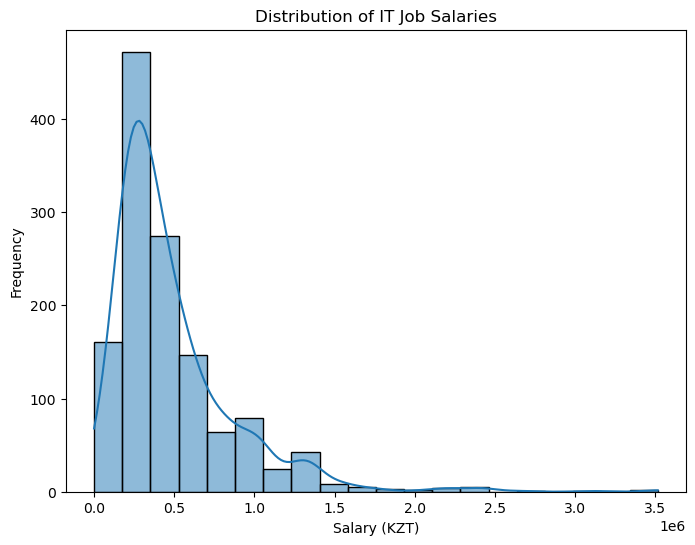

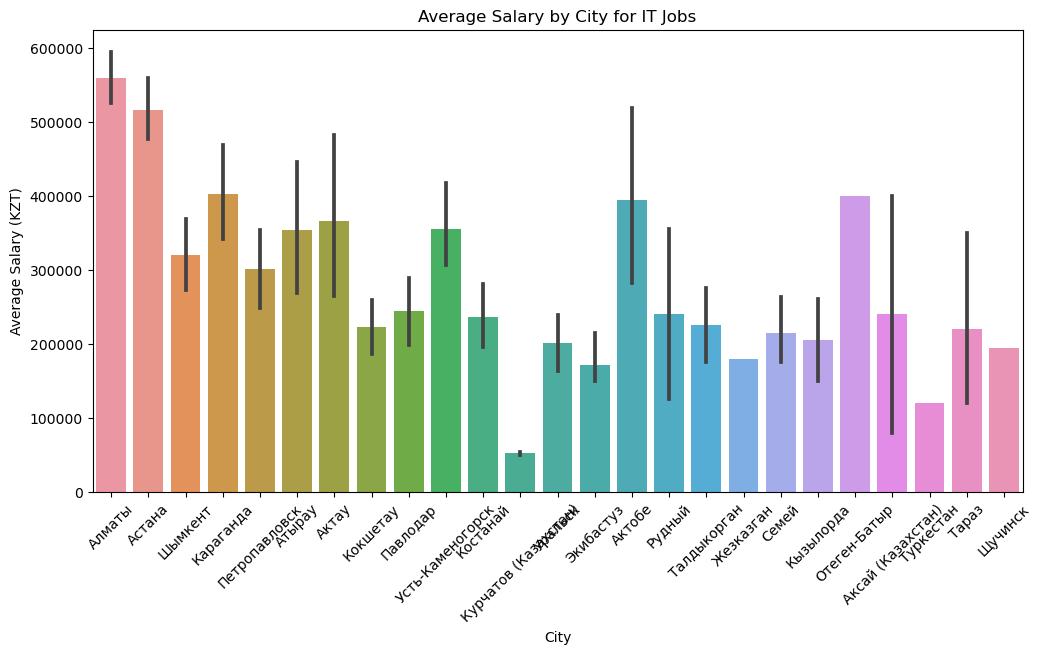

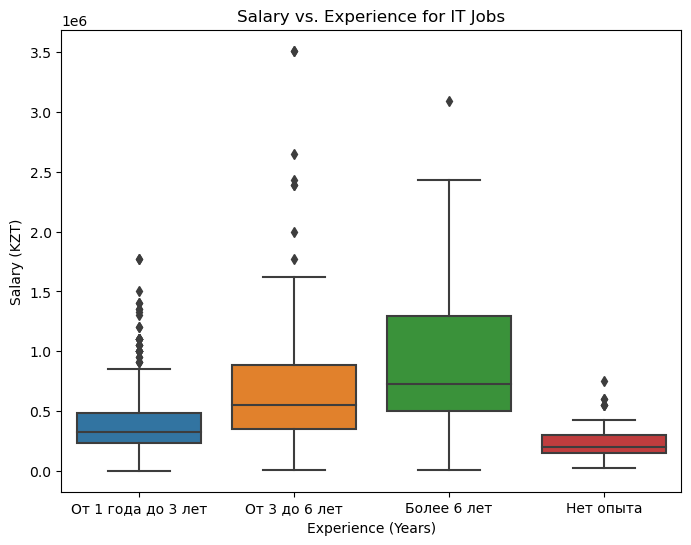

In [4]:

# 2. Salary Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data[['mean_salary']].mean(axis=1), bins=20, kde=True)
plt.xlabel('Salary (KZT)')
plt.ylabel('Frequency')
plt.title('Distribution of IT Job Salaries')
plt.show()

# 3. Salary by City
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y=data[['mean_salary']].mean(axis=1), data=data)
plt.xlabel('City')
plt.ylabel('Average Salary (KZT)')
plt.title('Average Salary by City for IT Jobs')
plt.xticks(rotation=45)
plt.show()

# 4. Salary vs. Experience
plt.figure(figsize=(8, 6))
sns.boxplot(x='experience', y=data[['mean_salary']].mean(axis=1), data=data)
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (KZT)')
plt.title('Salary vs. Experience for IT Jobs')
plt.show()


Linear regression:
Mean Squared Error: 8.201175631976891e+33
Размерность X_train: (1036, 42)
Размерность X_test: (259, 42)
Размерность y_train: (1036,)
Размерность y_test: (259,)


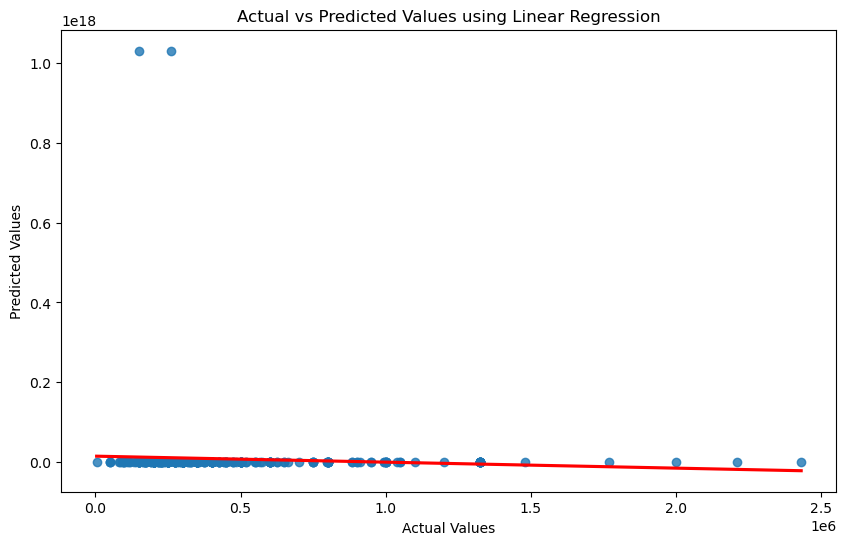

In [5]:
#linear regression
data_encoded = pd.get_dummies(data, columns=['city', 'vac'])
X = data_encoded.drop(columns=['mean_salary', '_id', 'Unnamed: 0', 'Unnamed: 1', 'title', 'job', 'requirements', 'responsibilities', 'experience', 'employment', 'url', 'max_salary', 'min_salary', 'publish_date',])
y = data_encoded['mean_salary']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Linear regression:")
print(f'Mean Squared Error: {mse}')

print("Размерность X_train:", X_train.shape)
print("Размерность X_test:", X_test.shape)
print("Размерность y_train:", y_train.shape)
print("Размерность y_test:", y_test.shape)
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using Linear Regression')
plt.show()

In [6]:
#finding of best hyperparametr
model = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
}
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X, y)
print("Наилучшие гиперпараметры:", random_search.best_params_)

Наилучшие гиперпараметры: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


In [7]:
from xgboost import XGBRegressor
best_params = {
    'subsample': 0.6,
    'reg_lambda': 0.5,
    'reg_alpha': 0.1,
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.05,
    'colsample_bytree': 0.6
}
model_xgb_best = XGBRegressor(**best_params)
model_xgb_best.fit(X, y)
y_pred_xgb_best = model_xgb_best.predict(X_test)


R^2 Score: 0.11866281479949214


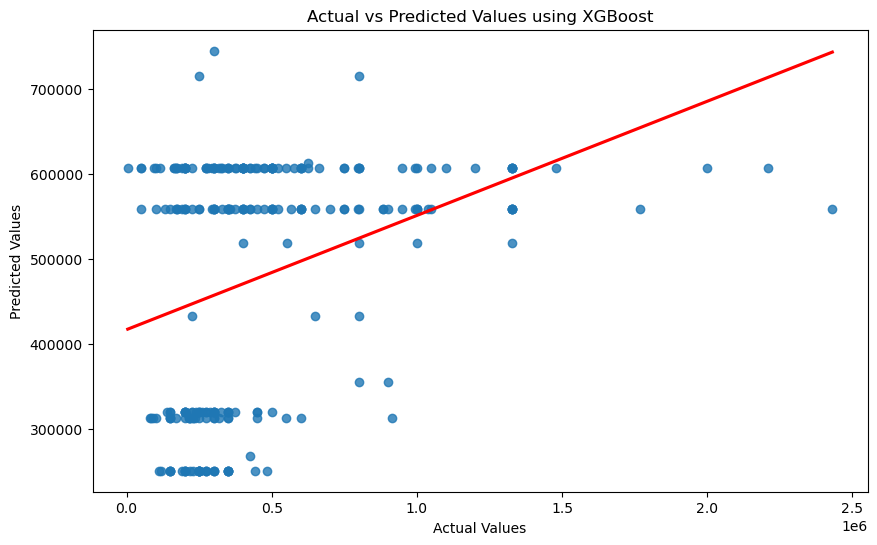

In [14]:
data_encoded = pd.get_dummies(data, columns=['vac'])
X = data_encoded.drop(columns=['mean_salary', '_id', 'Unnamed: 0', 'Unnamed: 1', 'title', 'city', 'job', 'requirements', 'responsibilities', 'experience', 'employment', 'url', 'max_salary', 'min_salary', 'publish_date'])
y = data_encoded['mean_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_xgb_best = XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.05, subsample=0.6, reg_lambda=0.1, colsample_bytree=0.6)
model_xgb_best.fit(X_train, y_train)
y_pred_xgb_best = model_xgb_best.predict(X_test)
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)
print(f'R^2 Score: {r2_xgb_best}')
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb_best})
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=predictions, ci=None, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using XGBoost')
plt.show()

In [36]:
#finding of best hyperparametr
model_rf = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 12, 15, 18, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    
}
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid_rf, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)
print("Наилучшие гиперпараметры для Random Forest:", random_search_rf.best_params_)

Наилучшие гиперпараметры для Random Forest: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_depth': 18}


R^2 Score: 0.14256517157381376


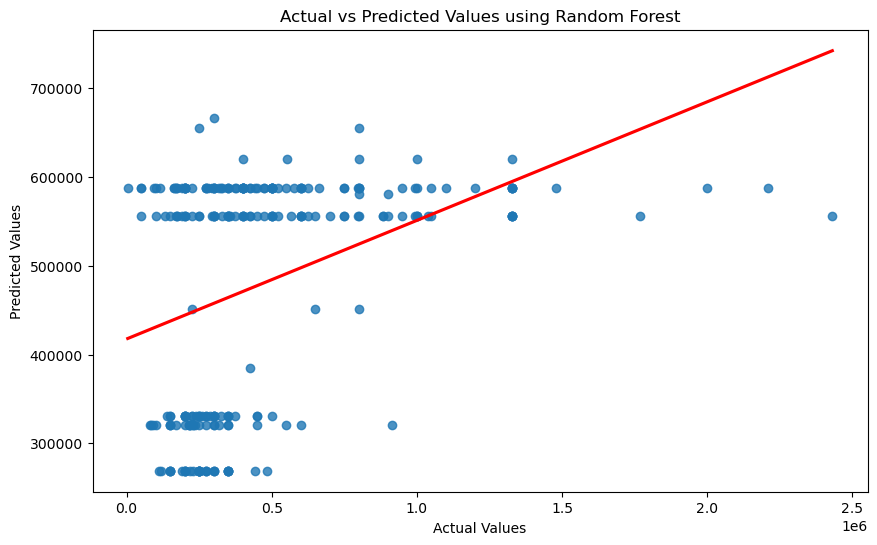

In [37]:
#randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
model_rf_best = RandomForestRegressor(n_estimators=500, min_samples_split=20, min_samples_leaf=2, max_depth= 12,max_features='sqrt' )
model_rf_best.fit(X, y)
y_pred_rf_best = model_rf_best.predict(X_test)
residuals_rf = y_test - y_pred_rf_best

r2_rf_best = r2_score(y_test, y_pred_rf_best)

print(f'R^2 Score: {r2_rf_best}')
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf_best})

plt.figure(figsize=(10, 6))
sns.regplot(x='Actual', y='Predicted', data=predictions, ci=None, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values using Random Forest')
plt.show()

R^2 Score: -0.060564830084449905
          Predicted     Actual
834   375014.796355    90000.0
327   375110.634849  1050000.0
839   375014.796355   300000.0
1121  375110.634849   275000.0
976   375040.395744   200000.0
...             ...        ...
199   375077.807919  1326000.0
467   375066.138371   500000.0
925   375046.733648   800000.0
282   375110.634849   200000.0
10    375041.729059   250000.0

[259 rows x 2 columns]


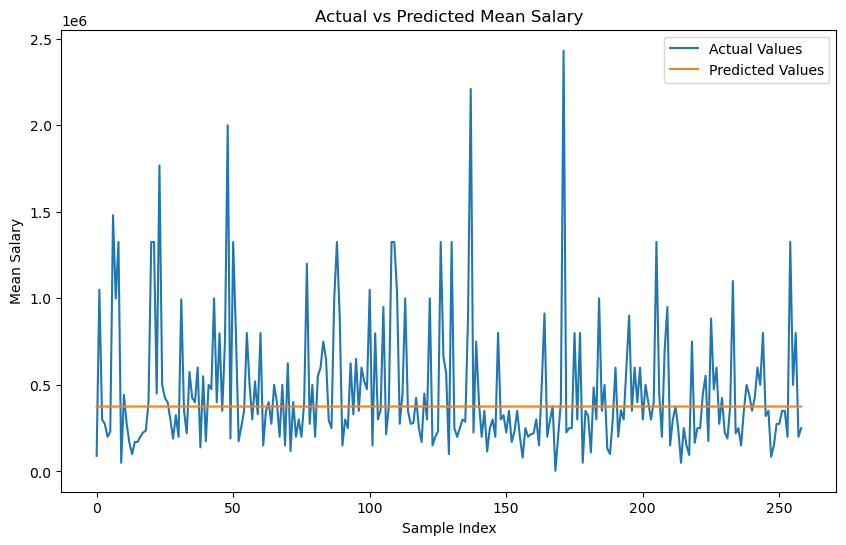

In [38]:

data_encoded = pd.get_dummies(data, columns=['city','vac'])
X = data_encoded.drop(columns=['mean_salary', '_id', 'Unnamed: 0', 'Unnamed: 1', 'title', 'job', 'requirements', 'responsibilities', 'experience', 'employment', 'url', 'max_salary', 'min_salary', 'publish_date'])
y = data_encoded['mean_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_svr = SVR(kernel='rbf', C=1.0, gamma='scale')
model_svr.fit(X_train, y_train)

y_pred = model_svr.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

prediction = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
print(prediction)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Mean Salary')
plt.title('Actual vs Predicted Mean Salary')
plt.legend()
plt.show()


In [43]:
data_with_predictions = data_encoded.copy()
data_with_predictions['Predicted_Mean_Salary'] = model_rf_best.predict(data_with_predictions.drop(columns=['mean_salary', '_id', 'Unnamed: 0', 'Unnamed: 1', 'title', 'city', 'job', 'requirements', 'responsibilities', 'experience', 'employment', 'url', 'max_salary', 'min_salary', 'publish_date']))

# Сохранение нового датасета в CSV-файл
data_with_predictions.to_csv('data_with_predictions.csv', index=False)
print("Датасет с предсказаниями успешно сохранен в 'data_with_predictions.csv'")

Датасет с предсказаниями успешно сохранен в 'data_with_predictions.csv'
